<a href="https://colab.research.google.com/github/pramod-nitk/NLP/blob/main/Single_Layer_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow_datasets as tfds

In [2]:
imdb_subwords, info_subwords = tfds.load("imdb_reviews/subwords8k", as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteJ6L9EA/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteJ6L9EA/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteJ6L9EA/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
tokenizer = info_subwords.features['text'].encoder

# Prepare the datasets

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

train_data, test_data = imdb_subwords["train"], imdb_subwords["test"]

In [5]:
train_data = train_data.shuffle(BUFFER_SIZE)
train_data = train_data.padded_batch(BATCH_SIZE)
test_data = test_data.padded_batch(BATCH_SIZE)

# Build and Compile the model

In [6]:
import tensorflow as tf
embedding_dim=64
lstm_dim = 64
dense_dim = 64

In [7]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)))
model.add(tf.keras.layers.Dense(dense_dim, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirection  (None, 128)               66048     
 al)                                                             
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 598209 (2.28 MB)
Trainable params: 598209 (2.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [9]:
model.fit(train_data, epochs=10, validation_data = test_data)

Epoch 1/10
98/98 [==============================] - 46s 378ms/step - loss: 0.5620 - accuracy: 0.6878 - val_loss: 0.5292 - val_accuracy: 0.7417
Epoch 2/10
98/98 [==============================] - 32s 324ms/step - loss: 0.3154 - accuracy: 0.8741 - val_loss: 0.3895 - val_accuracy: 0.8420
Epoch 3/10
98/98 [==============================] - 27s 272ms/step - loss: 0.2254 - accuracy: 0.9189 - val_loss: 0.5312 - val_accuracy: 0.8493
Epoch 4/10
98/98 [==============================] - 26s 263ms/step - loss: 0.2050 - accuracy: 0.9292 - val_loss: 0.3970 - val_accuracy: 0.8514
Epoch 5/10
98/98 [==============================] - 26s 265ms/step - loss: 0.1581 - accuracy: 0.9461 - val_loss: 0.4679 - val_accuracy: 0.8344
Epoch 6/10
98/98 [==============================] - 28s 283ms/step - loss: 0.1317 - accuracy: 0.9570 - val_loss: 0.4707 - val_accuracy: 0.8486
Epoch 7/10
98/98 [==============================] - 23s 232ms/step - loss: 0.1239 - accuracy: 0.9585 - val_loss: 0.5147 - val_accuracy: 0.8439

In [11]:
history = model.history

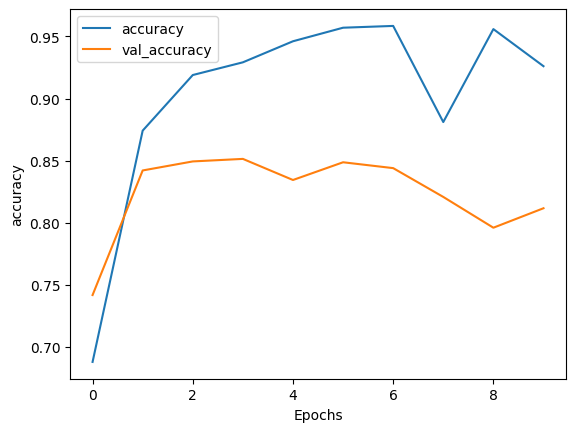

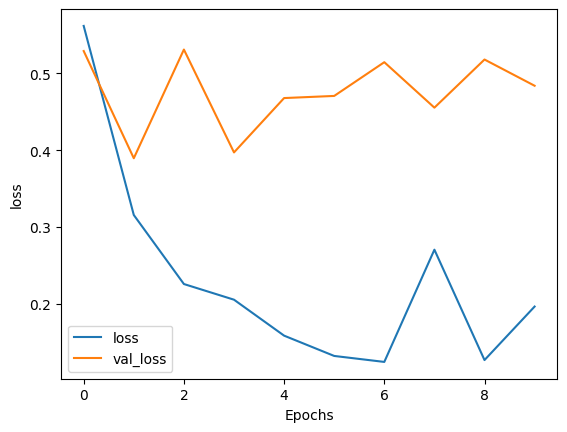

In [12]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")